# 3. Modelling

Tasks to perform:

3.1. Build Models  
3.2. Evaluate Models  
3.3. Interpret best overall model

In [1]:
# import modules
import numpy as np
import pandas as pd

In [2]:
# read data
songs_df = pd.read_csv('Data/spotify_global_songs_final_3.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_id                  11854 non-null  object 
 1   popularity               11854 non-null  float64
 2   title                    11854 non-null  object 
 3   artist                   11854 non-null  object 
 4   album/single             11854 non-null  object 
 5   artist_followers         11854 non-null  int64  
 6   explicit                 11854 non-null  int64  
 7   album                    11854 non-null  object 
 8   release_date             11854 non-null  object 
 9   danceability             11854 non-null  float64
 10  energy                   11854 non-null  float64
 11  key                      11854 non-null  float64
 12  loudness                 11854 non-null  float64
 13  mode                     11854 non-null  float64
 14  speechiness           

In [5]:
x_cols = [col for col in songs_df.columns if '_norm' in col and col !='days_since_release_norm']
x_cols.extend([col for col in songs_df.columns if 'typ' in col])
x_cols.extend(['explicit', 'artist_followers', 'days_since_release'])
x_cols

['artist_followers_norm',
 'danceability_norm',
 'energy_norm',
 'loudness_norm',
 'speechiness_norm',
 'acousticness_norm',
 'instrumentalness_norm',
 'liveness_norm',
 'valence_norm',
 'tempo_norm',
 'duration_ms_norm',
 'mode_norm',
 'avg_acoustic_typ']

In [7]:
# select data
target = 'top50_dummy'

model_cols = x_cols[:]
model_cols.append(target)

model_df = songs_df[model_cols]

X = model_df[x_cols]
y = model_df[target]
model_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_followers_norm  11854 non-null  float64
 1   danceability_norm      11854 non-null  float64
 2   energy_norm            11854 non-null  float64
 3   loudness_norm          11854 non-null  float64
 4   speechiness_norm       11854 non-null  float64
 5   acousticness_norm      11854 non-null  float64
 6   instrumentalness_norm  11854 non-null  float64
 7   liveness_norm          11854 non-null  float64
 8   valence_norm           11854 non-null  float64
 9   tempo_norm             11854 non-null  float64
 10  duration_ms_norm       11854 non-null  float64
 11  mode_norm              11854 non-null  float64
 12  avg_acoustic_typ       11854 non-null  float64
 13  top50_dummy            11854 non-null  float64
dtypes: float64(14)
memory usage: 1.3 MB


In [8]:
# check for collinearity
model_df.corr()

artist_followers_norm  danceability_norm  energy_norm  \
artist_followers_norm               1.000000           0.017178     0.017377   
danceability_norm                   0.017178           1.000000     0.081068   
energy_norm                         0.017377           0.081068     1.000000   
loudness_norm                       0.089657           0.062050     0.703440   
speechiness_norm                    0.050284           0.194471     0.027584   
acousticness_norm                   0.018245          -0.169262    -0.462789   
instrumentalness_norm               0.012163          -0.018753    -0.007087   
liveness_norm                       0.000452          -0.100715     0.148489   
valence_norm                       -0.038088           0.298501     0.358813   
tempo_norm                          0.043912          -0.071249     0.067669   
duration_ms_norm                    0.108899          -0.204609    -0.018826   
mode_norm                           0.033615          -0.063029    -0.039746   
avg_acoustic_typ                    0.005576           0.486103     0.568099   
top50_dummy                        -0.023899           0.057814     0.006604   

                       loudness_norm  speechiness_norm  acousticness_norm  \
artist_followers_norm       0.089657          0.050284           0.018245   
danceability_norm           0.062050          0.194471          -0.169262   
energy_norm                 0.703440          0.027584          -0.462789   
loudness_norm               1.000000         -0.080328          -0.354354   
speechiness_norm           -0.080328          1.000000          -0.000881   
acousticness_norm          -0.354354         -0.000881           1.000000   
instrumentalness_norm      -0.071997         -0.074830          -0.005385   
liveness_norm               0.096771         -0.004588          -0.079705   
valence_norm                0.264446          0.018937          -0.083473   
tempo_norm                  0.051562          0.053411          -0.071978   
duration_ms_norm           -0.014060         -0.132226           0.038501   
mode_norm                   0.004842         -0.057996          -0.008009   
avg_acoustic_typ            0.530128         -0.013835          -0.427626   
top50_dummy                -0.015518          0.057426           0.005106   

                       instrumentalness_norm  liveness_norm  valence_norm  \
artist_followers_norm               0.012163       0.000452     -0.038088   
danceability_norm                  -0.018753      -0.100715      0.298501   
energy_norm                        -0.007087       0.148489      0.358813   
loudness_norm                      -0.071997       0.096771      0.264446   
speechiness_norm                   -0.074830      -0.004588      0.018937   
acousticness_norm                  -0.005385      -0.079705     -0.083473   
instrumentalness_norm               1.000000      -0.022111     -0.035339   
liveness_norm                      -0.022111       1.000000      0.039096   
valence_norm                       -0.035339       0.039096      1.000000   
tempo_norm                          0.006144       0.010005      0.032633   
duration_ms_norm                    0.033405      -0.016584     -0.122180   
mode_norm                           0.006491       0.017078     -0.047069   
avg_acoustic_typ                   -0.193339      -0.027316      0.406396   
top50_dummy                        -0.009028      -0.015149      0.001574   

                       tempo_norm  duration_ms_norm  mode_norm  \
artist_followers_norm    0.043912          0.108899   0.033615   
danceability_norm       -0.071249         -0.204609  -0.063029   
energy_norm              0.067669         -0.018826  -0.039746   
loudness_norm            0.051562         -0.014060   0.004842   
speechiness_norm         0.053411         -0.132226  -0.057996   
acousticness_norm       -0.071978          0.038501  -0.008009   
instrumentalness_norm    0.006144          0.033

In [9]:
model_eval_dfs = []

In [10]:
# model construction
from pycaret.classification import *

# no resampling
clf_none = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            train_size=0.7)
        

In [11]:
top3_none = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [12]:
xgb_none = create_model('xgboost')
xgb_none = tune_model(xgb_none, optimize='F1')
xgb_none_metrics = pull()
xgb_none_df = xgb_none_metrics.iloc[10:11]
xgb_none_df[['model', 'resampling']] = ['xgb', 'none']
model_eval_dfs.append(xgb_none_df)
xgb_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.4001  0.6136  0.8611  0.2639  0.4039  0.0668  0.1199   xgb   

     resampling  
Mean       none

In [13]:
lr_none = create_model('lr')
lr_none = tune_model(lr_none, optimize='F1')
lr_none_metrics = pull()
lr_none_df = lr_none_metrics.iloc[10:11]
lr_none_df[['model', 'resampling']] = ['lr', 'none']
model_eval_dfs.append(lr_none_df)
lr_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.5373  0.5745   0.594  0.2765  0.3772  0.0814  0.0967    lr   

     resampling  
Mean       none

In [14]:
knn_none = create_model('knn')
knn_none = tune_model(knn_none, optimize='F1')
knn_none_metrics = pull()
knn_none_df = knn_none_metrics.iloc[10:11]
knn_none_df[['model', 'resampling']] = ['knn', 'none']
model_eval_dfs.append(knn_none_df)
knn_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.7469  0.5624   0.094  0.3609  0.1489  0.0571  0.0752   knn   

     resampling  
Mean       none

In [15]:
# oversampling with SMOTE
clf_over = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            train_size=0.7)

In [16]:
top3_over = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [17]:
xgb_over = create_model('xgboost')
xgb_over = tune_model(xgb_over, optimize='F1')
xgb_over_metrics = pull()
xgb_over_df = xgb_over_metrics.iloc[10:11]
xgb_over_df[['model', 'resampling']] = ['xgb', 'over']
model_eval_dfs.append(xgb_over_df)
xgb_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa    MCC model resampling
Mean    0.4373  0.6019  0.8024  0.2685  0.4023  0.0753  0.118   xgb       over

In [18]:
lr_over = create_model('lr')
lr_over = tune_model(lr_over, optimize='F1')
lr_over_metrics = pull()
lr_over_df = lr_over_metrics.iloc[10:11]
lr_over_df[['model', 'resampling']] = ['lr', 'over']
model_eval_dfs.append(lr_over_df)
lr_over_df

Accuracy    AUC  Recall   Prec.      F1  Kappa     MCC model resampling
Mean    0.5384  0.578  0.6017  0.2786  0.3807  0.086  0.1024    lr       over

In [19]:
knn_over = create_model('knn')
knn_over = tune_model(knn_over, optimize='F1')
knn_over_metrics = pull()
knn_over_df = knn_over_metrics.iloc[10:11]
knn_over_df[['model', 'resampling']] = ['knn', 'over']
model_eval_dfs.append(knn_over_df)
knn_over_df

Accuracy     AUC  Recall   Prec.      F1  Kappa     MCC model resampling
Mean    0.5099  0.6042  0.6803  0.2792  0.3958  0.092  0.1182   knn       over

In [20]:
from imblearn.under_sampling import *
tomek_links1 = TomekLinks()

# undersampling with Tomek Links
clf_under = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            fix_imbalance_method=tomek_links1, 
            train_size=0.7)

In [21]:
top3_under = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [22]:
xgb_under = create_model('xgboost')
xgb_under = tune_model(xgb_under, optimize='F1')
xgb_under_metrics = pull()
xgb_under_df = xgb_under_metrics.iloc[10:11]
xgb_under_df[['model', 'resampling']] = ['xgb', 'under']
model_eval_dfs.append(xgb_under_df)
xgb_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.3909  0.6115  0.8744  0.2626  0.4039  0.0643  0.1199   xgb   

     resampling  
Mean      under

In [23]:
lr_under = create_model('lr')
lr_under = tune_model(lr_under, optimize='F1')
lr_under_metrics = pull()
lr_under_df = lr_under_metrics.iloc[10:11]
lr_under_df[['model', 'resampling']] = ['lr', 'under']
model_eval_dfs.append(lr_under_df)
lr_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.5348  0.5742  0.6017  0.2767  0.3789  0.0823  0.0985    lr   

     resampling  
Mean      under

In [24]:
knn_under = create_model('knn')
knn_under = tune_model(knn_under, optimize='F1')
knn_under_metrics = pull()
knn_under_df = knn_under_metrics.iloc[10:11]
knn_under_df[['model', 'resampling']] = ['knn', 'under']
model_eval_dfs.append(knn_under_df)
knn_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.7367  0.5866  0.1389  0.3514  0.1988  0.0759  0.0875   knn   

     resampling  
Mean      under

In [25]:
# combine evaluation metrics

model_metrics_df = pd.concat(model_eval_dfs)
model_metrics_df = model_metrics_df.sort_values(by='F1', ascending=False)
model_metrics_df.to_csv('Data/model_metrics.csv')
model_metrics_df

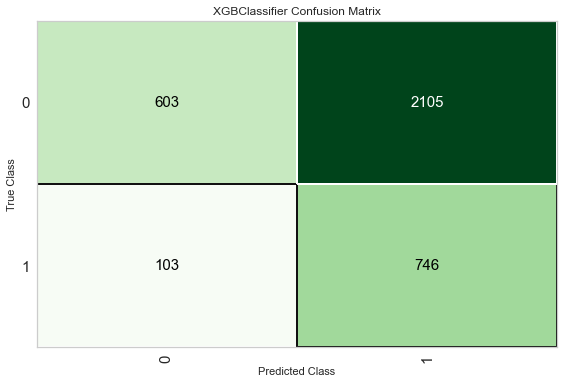

In [26]:
plot_model(xgb_under, 'confusion_matrix')

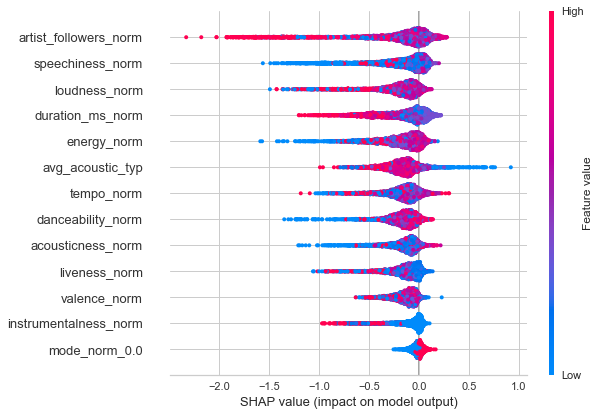

In [27]:
interpret_model(xgb_under)